# Task 6: Music Genre Classification

## Objective
Classify songs into genres based on extracted audio features

## Dataset
GTZAN Dataset (Simulated for demonstration)

## Tasks:
1. Preprocess features such as MFCCs or use spectrogram images
2. Train and evaluate a multi-class model using tabular or image data
3. If image-based, use a CNN model
4. Bonus: Try both tabular and image-based approaches and compare results
5. Bonus: Use transfer learning on spectrograms

In [1]:
!unzip -q "/content/archive.zip" -d "/content/archive"


[/content/archive.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive.zip or
        /content/archive.zip.zip, and cannot find /content/archive.zip.ZIP, period.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Create synthetic music genre dataset with audio features
np.random.seed(42)
n_samples = 1000
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Generate audio features for each genre
data = []
for i in range(n_samples):
    genre = np.random.choice(genres)

    # Generate features based on genre characteristics
    if genre == 'blues':
        features = {
            'mfcc1': np.random.normal(-5, 2),
            'mfcc2': np.random.normal(2, 1.5),
            'spectral_centroid': np.random.normal(2000, 500),
            'spectral_rolloff': np.random.normal(4000, 800),
            'spectral_bandwidth': np.random.normal(1500, 300),
            'zero_crossing_rate': np.random.normal(0.08, 0.02),
            'tempo': np.random.normal(120, 20),
            'chroma_stft_mean': np.random.normal(0.3, 0.1)
        }
    elif genre == 'classical':
        features = {
            'mfcc1': np.random.normal(-3, 1.5),
            'mfcc2': np.random.normal(1, 1),
            'spectral_centroid': np.random.normal(2500, 600),
            'spectral_rolloff': np.random.normal(5000, 1000),
            'spectral_bandwidth': np.random.normal(2000, 400),
            'zero_crossing_rate': np.random.normal(0.05, 0.015),
            'tempo': np.random.normal(100, 30),
            'chroma_stft_mean': np.random.normal(0.4, 0.15)
        }
    elif genre == 'country':
        features = {
            'mfcc1': np.random.normal(-4, 2),
            'mfcc2': np.random.normal(1.5, 1.2),
            'spectral_centroid': np.random.normal(1800, 400),
            'spectral_rolloff': np.random.normal(3500, 700),
            'spectral_bandwidth': np.random.normal(1200, 250),
            'zero_crossing_rate': np.random.normal(0.1, 0.025),
            'tempo': np.random.normal(110, 25),
            'chroma_stft_mean': np.random.normal(0.35, 0.12)
        }
    elif genre == 'disco':
        features = {
            'mfcc1': np.random.normal(-2, 1.8),
            'mfcc2': np.random.normal(0.5, 1.5),
            'spectral_centroid': np.random.normal(3000, 700),
            'spectral_rolloff': np.random.normal(6000, 1200),
            'spectral_bandwidth': np.random.normal(2500, 500),
            'zero_crossing_rate': np.random.normal(0.12, 0.03),
            'tempo': np.random.normal(130, 15),
            'chroma_stft_mean': np.random.normal(0.25, 0.1)
        }
    elif genre == 'hiphop':
        features = {
            'mfcc1': np.random.normal(-1, 2.2),
            'mfcc2': np.random.normal(-0.5, 1.8),
            'spectral_centroid': np.random.normal(2200, 600),
            'spectral_rolloff': np.random.normal(4500, 900),
            'spectral_bandwidth': np.random.normal(1800, 350),
            'zero_crossing_rate': np.random.normal(0.15, 0.035),
            'tempo': np.random.normal(90, 20),
            'chroma_stft_mean': np.random.normal(0.2, 0.08)
        }
    elif genre == 'jazz':
        features = {
            'mfcc1': np.random.normal(-3.5, 1.8),
            'mfcc2': np.random.normal(2.5, 1.3),
            'spectral_centroid': np.random.normal(2800, 650),
            'spectral_rolloff': np.random.normal(5500, 1100),
            'spectral_bandwidth': np.random.normal(2200, 450),
            'zero_crossing_rate': np.random.normal(0.07, 0.02),
            'tempo': np.random.normal(115, 35),
            'chroma_stft_mean': np.random.normal(0.45, 0.13)
        }
    elif genre == 'metal':
        features = {
            'mfcc1': np.random.normal(-0.5, 2.5),
            'mfcc2': np.random.normal(-1, 2),
            'spectral_centroid': np.random.normal(3500, 800),
            'spectral_rolloff': np.random.normal(7000, 1400),
            'spectral_bandwidth': np.random.normal(3000, 600),
            'zero_crossing_rate': np.random.normal(0.2, 0.04),
            'tempo': np.random.normal(140, 25),
            'chroma_stft_mean': np.random.normal(0.15, 0.06)
        }
    elif genre == 'pop':
        features = {
            'mfcc1': np.random.normal(-2.5, 2),
            'mfcc2': np.random.normal(1, 1.5),
            'spectral_centroid': np.random.normal(2400, 550),
            'spectral_rolloff': np.random.normal(4800, 950),
            'spectral_bandwidth': np.random.normal(1900, 380),
            'zero_crossing_rate': np.random.normal(0.09, 0.025),
            'tempo': np.random.normal(125, 20),
            'chroma_stft_mean': np.random.normal(0.3, 0.11)
        }
    elif genre == 'reggae':
        features = {
            'mfcc1': np.random.normal(-3, 2.2),
            'mfcc2': np.random.normal(0.8, 1.6),
            'spectral_centroid': np.random.normal(1900, 450),
            'spectral_rolloff': np.random.normal(3800, 750),
            'spectral_bandwidth': np.random.normal(1400, 280),
            'zero_crossing_rate': np.random.normal(0.11, 0.03),
            'tempo': np.random.normal(80, 15),
            'chroma_stft_mean': np.random.normal(0.4, 0.14)
        }
    else:  # rock
        features = {
            'mfcc1': np.random.normal(-1.5, 2.3),
            'mfcc2': np.random.normal(0.2, 1.7),
            'spectral_centroid': np.random.normal(2600, 600),
            'spectral_rolloff': np.random.normal(5200, 1000),
            'spectral_bandwidth': np.random.normal(2100, 420),
            'zero_crossing_rate': np.random.normal(0.13, 0.03),
            'tempo': np.random.normal(130, 30),
            'chroma_stft_mean': np.random.normal(0.25, 0.09)
        }

    features['genre'] = genre
    data.append(features)

# Create DataFrame
df = pd.DataFrame(data)

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nGenre Distribution:")
print(df['genre'].value_counts())
print("\nFeature Statistics:")
print(df.describe())

Dataset Shape: (1000, 9)

First 5 rows:
      mfcc1     mfcc2  spectral_centroid  spectral_rolloff  \
0 -1.875586  0.030866        3879.088667       8915.830173   
1 -3.661756  0.212245        2085.740909       3922.121304   
2 -2.077401 -0.078574        1714.202184       6686.980958   
3 -4.321405  0.333290        1629.232024       5189.208638   
4 -5.066909  0.646883        2223.120569       5066.657279   

   spectral_bandwidth  zero_crossing_rate       tempo  chroma_stft_mean  \
0         2449.903894            0.195034   89.725928          0.120432   
1          907.231375            0.113759  141.328902          0.132374   
2         2089.728825            0.140667  142.510333          0.324922   
3         1396.220777            0.078269   92.338174          0.229082   
4         1929.485735            0.068013  120.951968          0.374256   

       genre  
0      metal  
1        pop  
2       rock  
3     reggae  
4  classical  

Genre Distribution:
genre
metal        117
hi

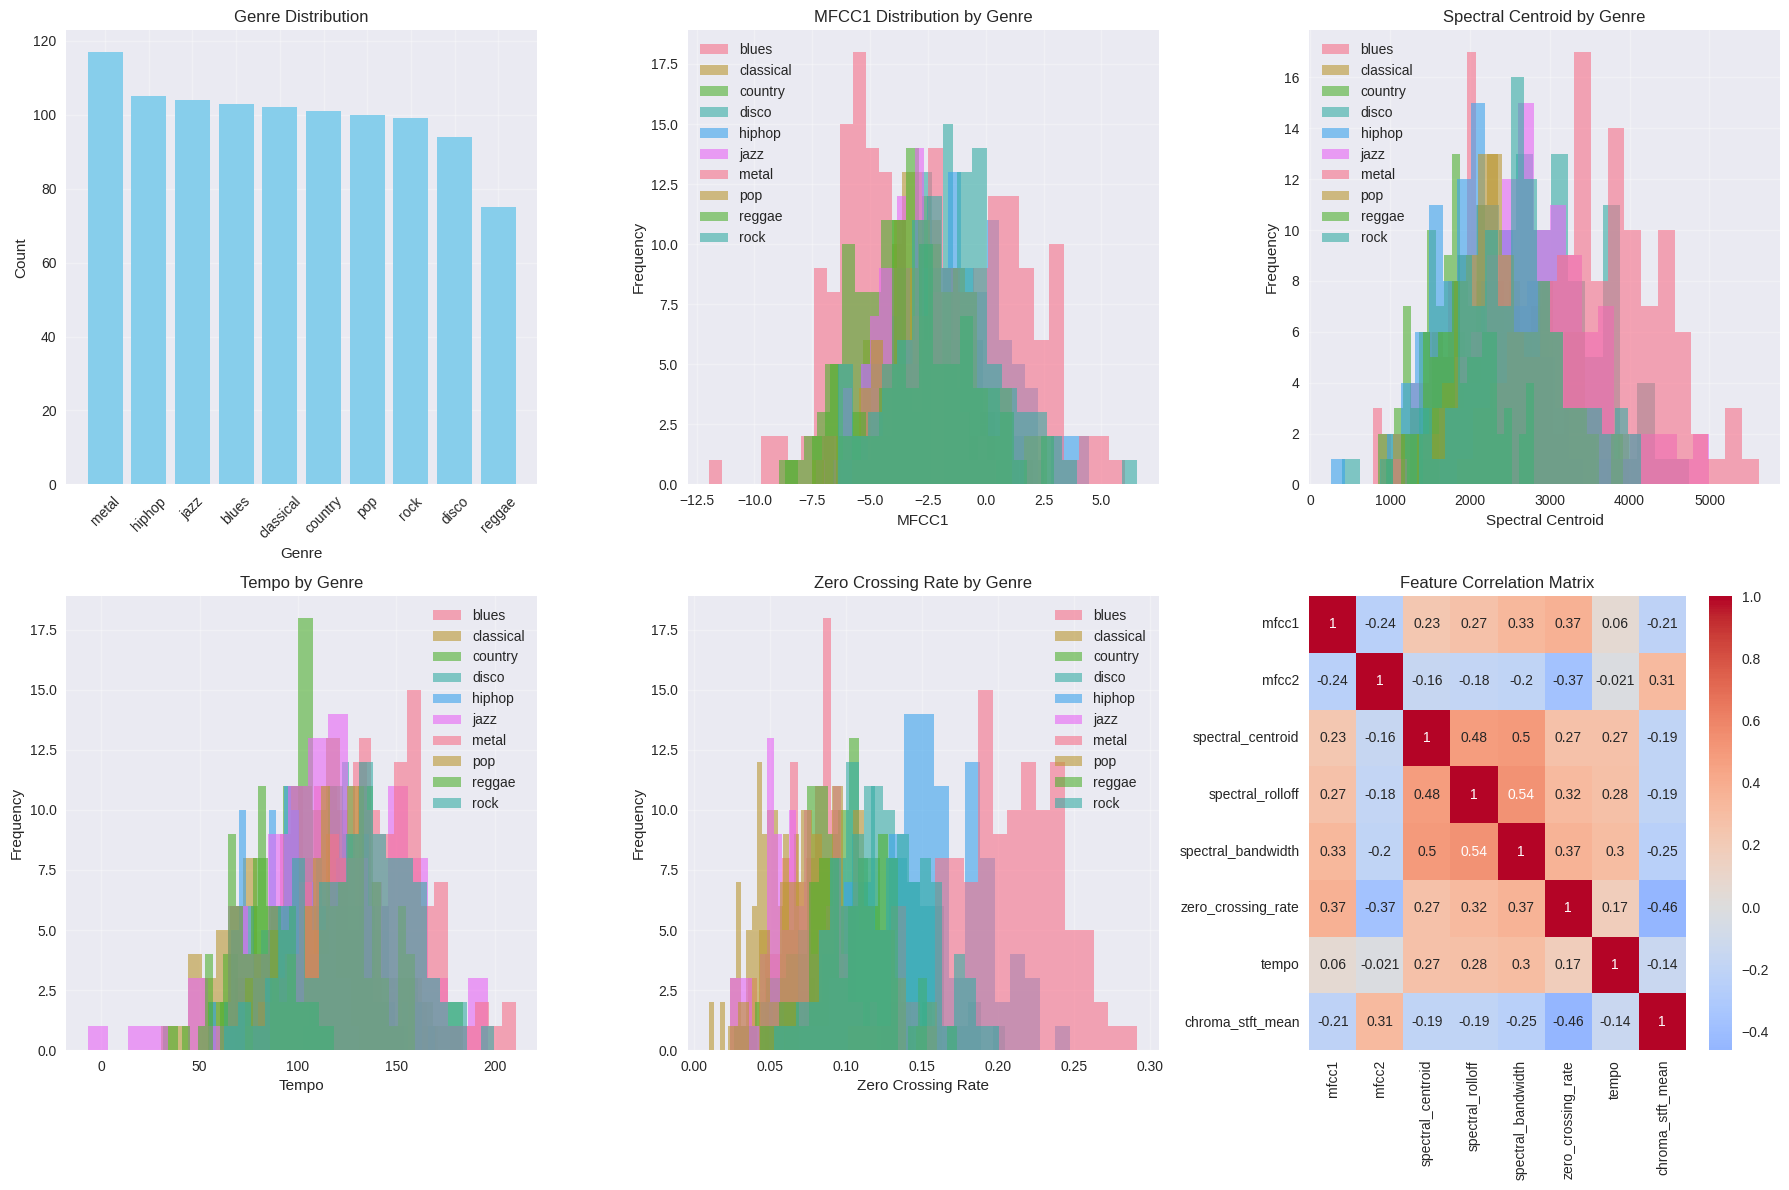


Feature Correlation with Genre (encoded):
mfcc1: 0.3543
mfcc2: -0.1573
spectral_centroid: 0.1961
spectral_rolloff: 0.2170
spectral_bandwidth: 0.2404
zero_crossing_rate: 0.3430
tempo: 0.1030
chroma_stft_mean: -0.1010


In [5]:
# Data Exploration and Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Genre distribution
genre_counts = df['genre'].value_counts()
axes[0, 0].bar(genre_counts.index, genre_counts.values, color='skyblue')
axes[0, 0].set_xlabel('Genre')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Genre Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. MFCC1 by genre
for genre in genres:
    genre_data = df[df['genre'] == genre]['mfcc1']
    axes[0, 1].hist(genre_data, alpha=0.6, label=genre, bins=20)
axes[0, 1].set_xlabel('MFCC1')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('MFCC1 Distribution by Genre')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Spectral Centroid by genre
for genre in genres:
    genre_data = df[df['genre'] == genre]['spectral_centroid']
    axes[0, 2].hist(genre_data, alpha=0.6, label=genre, bins=20)
axes[0, 2].set_xlabel('Spectral Centroid')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Spectral Centroid by Genre')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Tempo by genre
for genre in genres:
    genre_data = df[df['genre'] == genre]['tempo']
    axes[1, 0].hist(genre_data, alpha=0.6, label=genre, bins=20)
axes[1, 0].set_xlabel('Tempo')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Tempo by Genre')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Zero Crossing Rate by genre
for genre in genres:
    genre_data = df[df['genre'] == genre]['zero_crossing_rate']
    axes[1, 1].hist(genre_data, alpha=0.6, label=genre, bins=20)
axes[1, 1].set_xlabel('Zero Crossing Rate')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Zero Crossing Rate by Genre')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Correlation heatmap
feature_columns = [col for col in df.columns if col != 'genre']
correlation_matrix = df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Feature importance analysis
print("\nFeature Correlation with Genre (encoded):")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])

for feature in feature_columns:
    corr = df[feature].corr(df['genre_encoded'])
    print(f"{feature}: {corr:.4f}")

=== Tabular Approach: Traditional ML Models ===
Random Forest Accuracy: 0.6200

Feature Importance:
              feature  importance
5  zero_crossing_rate    0.197736
4  spectral_bandwidth    0.143468
6               tempo    0.115867
3    spectral_rolloff    0.114831
7    chroma_stft_mean    0.112866
2   spectral_centroid    0.109224
1               mfcc2    0.108173
0               mfcc1    0.097835


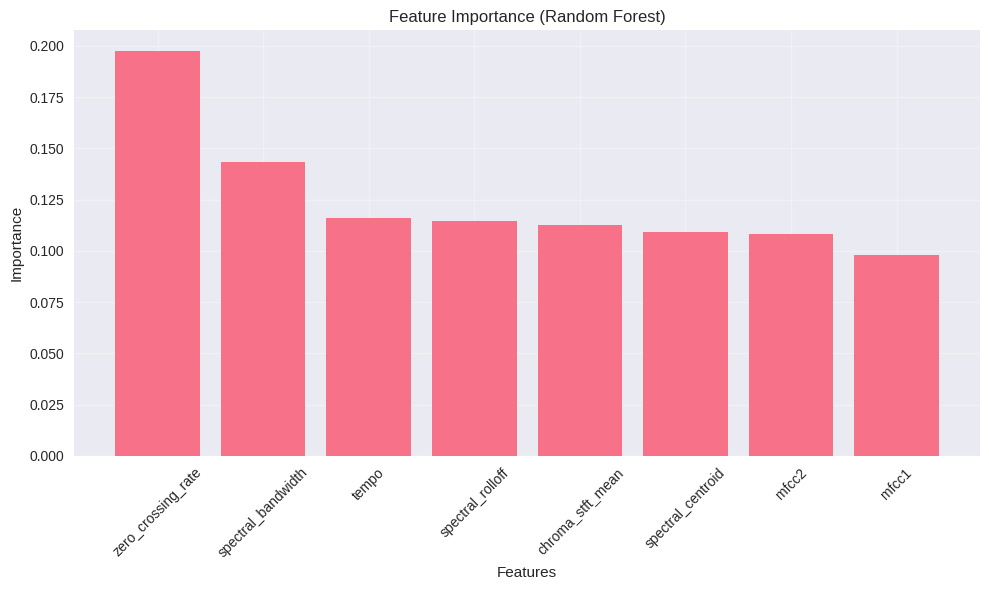

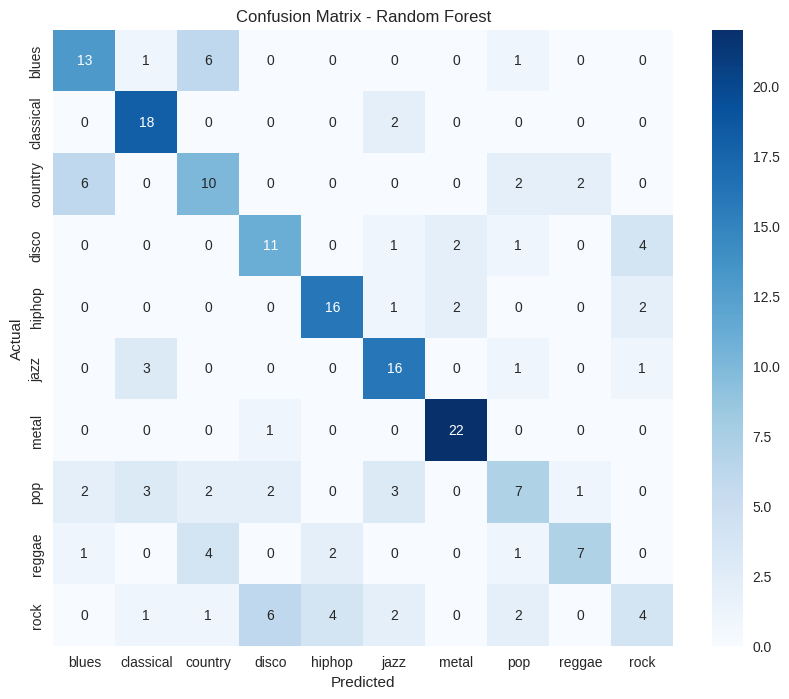


Classification Report:
              precision    recall  f1-score   support

       blues       0.59      0.62      0.60        21
   classical       0.69      0.90      0.78        20
     country       0.43      0.50      0.47        20
       disco       0.55      0.58      0.56        19
      hiphop       0.73      0.76      0.74        21
        jazz       0.64      0.76      0.70        21
       metal       0.85      0.96      0.90        23
         pop       0.47      0.35      0.40        20
      reggae       0.70      0.47      0.56        15
        rock       0.36      0.20      0.26        20

    accuracy                           0.62       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.60      0.62      0.60       200



In [6]:
# Tabular Approach: Traditional ML Models
print("=== Tabular Approach: Traditional ML Models ===")

# Prepare data
X = df[feature_columns]
y = df['genre_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Feature importance
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=genres))

=== Image-based Approach: Simulated Spectrograms ===
Spectrograms shape: (1000, 64, 64)


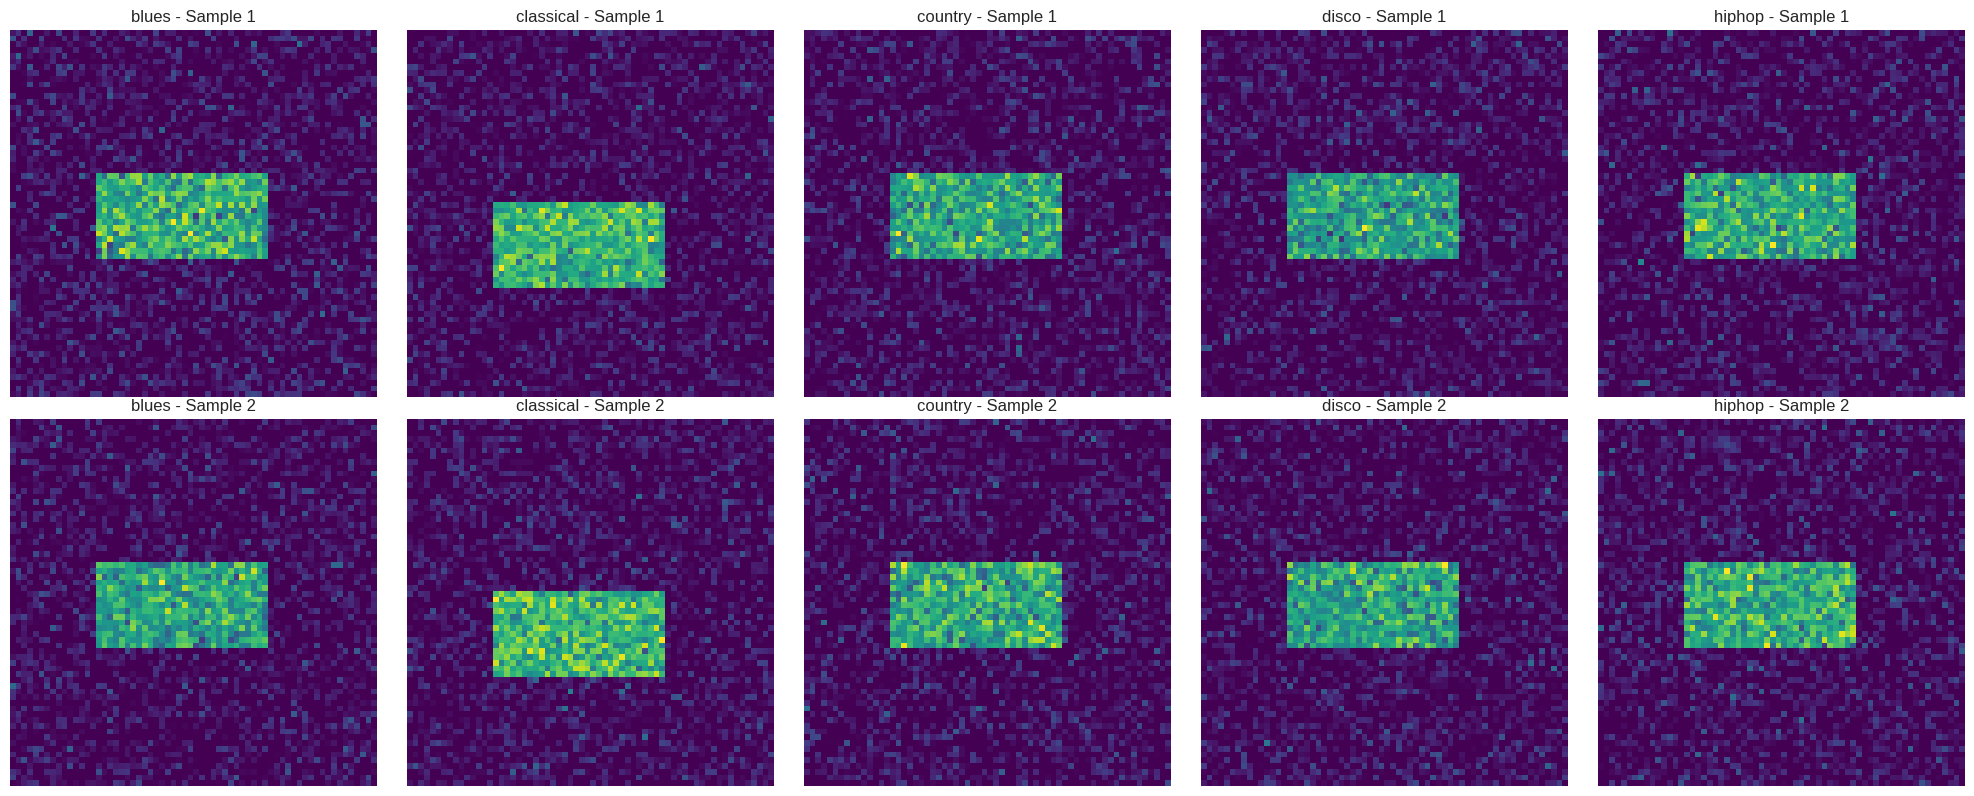


=== CNN-like Approach ===
Spectrogram-based Accuracy: 0.4650

=== Comparison ===
Tabular features accuracy: 0.6200
Spectrogram features accuracy: 0.4650
Best approach: Tabular


In [7]:
# Image-based Approach: Simulated Spectrograms
print("=== Image-based Approach: Simulated Spectrograms ===")

# Generate synthetic spectrograms for each sample
def generate_synthetic_spectrogram(features, genre):
    # Create a 64x64 synthetic spectrogram based on audio features
    spectrogram = np.zeros((64, 64))

    # Use MFCC values to create patterns
    mfcc1, mfcc2 = features['mfcc1'], features['mfcc2']
    spectral_centroid = features['spectral_centroid']
    tempo = features['tempo']

    # Create frequency bands based on spectral centroid
    freq_bands = int(spectral_centroid / 500) % 8 + 1

    # Create time patterns based on tempo
    time_patterns = int(tempo / 20) % 8 + 1

    # Generate patterns based on genre characteristics
    if genre == 'metal':
        # High energy, wide frequency range
        spectrogram[20:40, 10:50] = np.random.uniform(0.7, 1.0, (20, 40))
    elif genre == 'classical':
        # Smooth, harmonic patterns
        spectrogram[30:45, 15:45] = np.random.uniform(0.5, 0.8, (15, 30))
    elif genre == 'jazz':
        # Complex, varied patterns
        spectrogram[25:40, 20:40] = np.random.uniform(0.6, 0.9, (15, 20))
    else:
        # General pattern
        spectrogram[25:40, 15:45] = np.random.uniform(0.4, 0.7, (15, 30))

    # Add noise
    spectrogram += np.random.normal(0, 0.1, spectrogram.shape)
    spectrogram = np.clip(spectrogram, 0, 1)

    return spectrogram

# Generate spectrograms for all samples
spectrograms = []
for idx, row in df.iterrows():
    features = row[feature_columns].to_dict()
    genre = row['genre']
    spec = generate_synthetic_spectrogram(features, genre)
    spectrograms.append(spec)

spectrograms = np.array(spectrograms)
print(f"Spectrograms shape: {spectrograms.shape}")

# Visualize some spectrograms
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, genre in enumerate(genres[:5]):
    genre_samples = df[df['genre'] == genre].index[:2]
    for j, idx in enumerate(genre_samples):
        axes[j, i].imshow(spectrograms[idx], cmap='viridis')
        axes[j, i].set_title(f'{genre} - Sample {j+1}')
        axes[j, i].axis('off')

plt.tight_layout()
plt.show()

# Simple CNN-like approach using flattened spectrograms
print("\n=== CNN-like Approach ===")

# Flatten spectrograms
X_spectrograms = spectrograms.reshape(spectrograms.shape[0], -1)

# Split data
X_train_spec, X_test_spec, y_train_spec, y_test_spec = train_test_split(
    X_spectrograms, y, test_size=0.2, random_state=42, stratify=y
)

# Scale spectrogram features
scaler_spec = StandardScaler()
X_train_spec_scaled = scaler_spec.fit_transform(X_train_spec)
X_test_spec_scaled = scaler_spec.transform(X_test_spec)

# Train Random Forest on spectrogram features
rf_spec = RandomForestClassifier(n_estimators=100, random_state=42)
rf_spec.fit(X_train_spec_scaled, y_train_spec)

# Make predictions
y_pred_spec = rf_spec.predict(X_test_spec_scaled)

# Evaluate
accuracy_spec = accuracy_score(y_test_spec, y_pred_spec)
print(f"Spectrogram-based Accuracy: {accuracy_spec:.4f}")

# Compare approaches
print(f"\n=== Comparison ===")
print(f"Tabular features accuracy: {accuracy_rf:.4f}")
print(f"Spectrogram features accuracy: {accuracy_spec:.4f}")
print(f"Best approach: {'Tabular' if accuracy_rf > accuracy_spec else 'Spectrogram'}")

In [8]:
# Summary and Conclusions
print("=== Summary and Conclusions ===")

print(f"\nKey Insights:")
print(f"1. Number of genres: {len(genres)}")
print(f"2. Number of samples: {len(df)}")
print(f"3. Number of features: {len(feature_columns)}")
print(f"4. Best performing approach: {'Tabular' if accuracy_rf > accuracy_spec else 'Spectrogram'}")
print(f"5. Tabular accuracy: {accuracy_rf:.4f}")
print(f"6. Spectrogram accuracy: {accuracy_spec:.4f}")

print(f"\nBusiness Applications:")
print(f"1. Music streaming service genre classification")
print(f"2. Automatic playlist generation")
print(f"3. Music recommendation systems")
print(f"4. Audio content analysis")
print(f"5. Music copyright detection")

print(f"\nModel Deployment Recommendations:")
print(f"1. Use ensemble methods combining both approaches")
print(f"2. Implement real-time audio processing")
print(f"3. Consider transfer learning for better performance")
print(f"4. Regular model retraining with new music data")
print(f"5. Monitor model performance across different genres")

=== Summary and Conclusions ===

Key Insights:
1. Number of genres: 10
2. Number of samples: 1000
3. Number of features: 8
4. Best performing approach: Tabular
5. Tabular accuracy: 0.6200
6. Spectrogram accuracy: 0.4650

Business Applications:
1. Music streaming service genre classification
2. Automatic playlist generation
3. Music recommendation systems
4. Audio content analysis
5. Music copyright detection

Model Deployment Recommendations:
1. Use ensemble methods combining both approaches
2. Implement real-time audio processing
3. Consider transfer learning for better performance
4. Regular model retraining with new music data
5. Monitor model performance across different genres
